<h2>Importing librarys and data</h2>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os


In [17]:
df = pd.read_csv("train_data.csv")

In [18]:
#Looking some information of the data
print(df.shape)
print(df.nunique())


(7160, 14)
Customer Id           7160
YearOfObservation        5
Insured_Period         401
Residential              2
Building_Painted         2
Building_Fenced          2
Garden                   2
Settlement               2
Building Dimension    2043
Building_Type            4
Date_of_Occupancy      134
NumberOfWindows         11
Geo_Code              1307
Claim                    2
dtype: int64


In [19]:
df['Residential'].unique()
df['Building_Painted'].unique()  # dummie
df['Building_Fenced'].unique() #dummie
df['Garden'].unique() #dummie
df['Settlement'].unique() #dummie
df['NumberOfWindows'].unique() #ordinal 
df['Building_Type'].unique() # nominal use one hot encoding

array([1, 2, 4, 3], dtype=int64)

In [20]:
df.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
7,H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
8,H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.0,0,V,N,O,R,520.0,1,2011.0,2,1224,0


In [101]:
#Looking for Nulls and type of our data
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6543 entries, 0 to 7057
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   V                   6543 non-null   uint8  
 1   1                   6543 non-null   uint8  
 2   V                   6543 non-null   uint8  
 3   U                   6543 non-null   uint8  
 4   V                   6543 non-null   uint8  
 5   YearOfObservation   6543 non-null   int64  
 6   Insured_Period      6543 non-null   float64
 7   Building Dimension  6543 non-null   float64
 8   Building_Type       6543 non-null   int64  
 9   Date_of_Occupancy   6543 non-null   float64
 10  NumberOfWindows     6543 non-null   int64  
 11  Claim               6543 non-null   int64  
dtypes: float64(3), int64(4), uint8(5)
memory usage: 760.9 KB


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [24]:
df.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

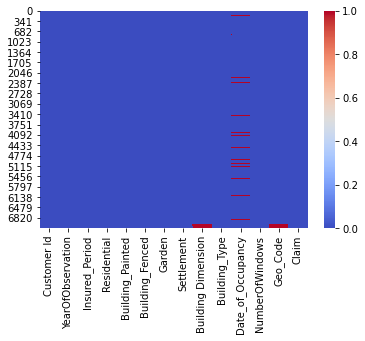

In [25]:
sns.heatmap(df.isnull(),cmap='coolwarm')

In [26]:
df.dropna(inplace=True)

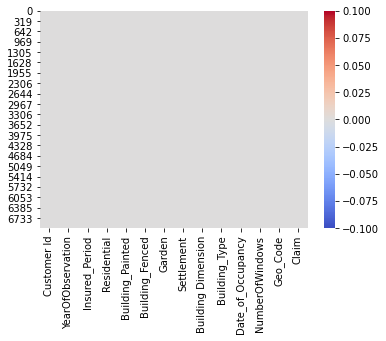

In [27]:
sns.heatmap(df.isnull(),cmap='coolwarm')

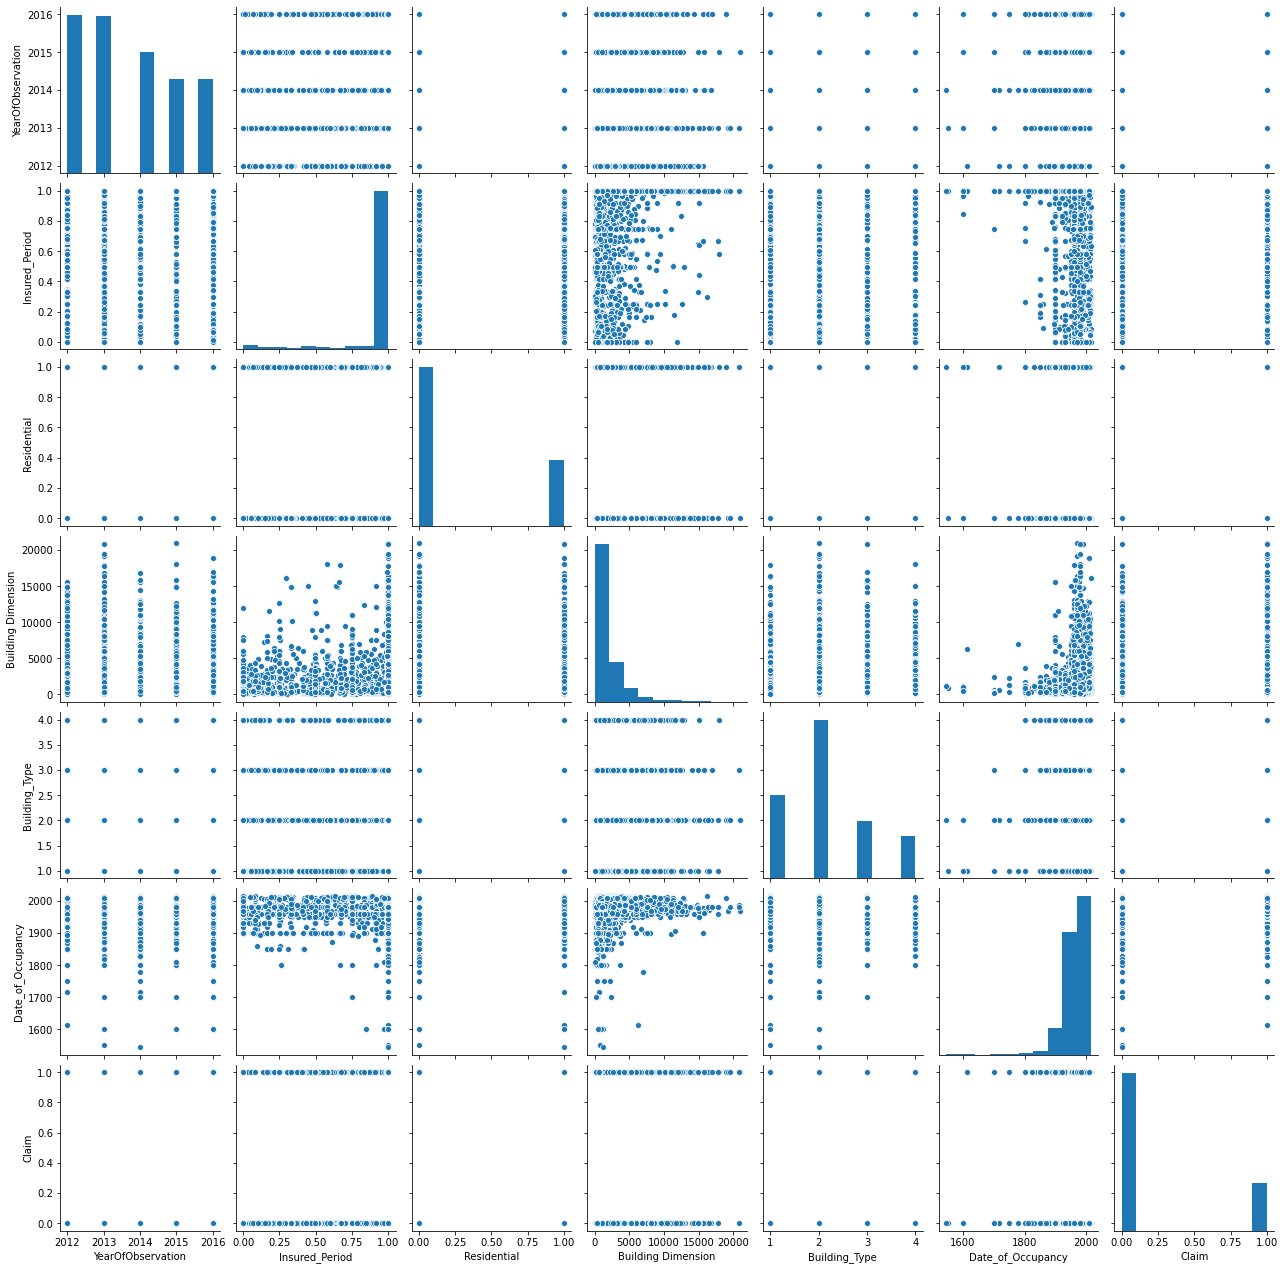

In [28]:
sns.pairplot(df)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algAorithm won't be able to directly take in those features as inputs.

In [29]:
df.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [31]:
Residential = pd.get_dummies(df['Residential'],drop_first=True)
Building_Painted = pd.get_dummies(df['Building_Painted'],drop_first=True)
Building_Fenced = pd.get_dummies(df['Building_Fenced'],drop_first=True)
Garden = pd.get_dummies(df['Garden'],drop_first=True)
Settlement = pd.get_dummies(df['Settlement'],drop_first=True)
Building_Type = pd.get_dummies(df['Building_Type'],drop_first=True)

In [32]:
df.drop(['Residential','Building_Painted','Building_Fenced','Garden','Settlement'],axis=1,inplace=True)

In [33]:
df['NumberOfWindows'].unique()

array(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

In [34]:
df['NumberOfWindows_'] = np.nan

df.loc[(df["NumberOfWindows"] == '   .'),"NumberOfWindows"] = 0
df.loc[(df["NumberOfWindows"] == '>=10'),"NumberOfWindows"] = 10



In [51]:
df['NumberOfWindows']= pd.to_numeric(df['NumberOfWindows'])

In [41]:
df.head(10)

,Customer Id,YearOfObservation,Insured_Period,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,NumberOfWindows_
0,H14663,2013,1.0,290.0,1,1960.0,0,1053,0,0
1,H2037,2015,1.0,490.0,1,1850.0,4,1053,0,4
2,H3802,2014,1.0,595.0,1,1960.0,0,1053,0,0
3,H3834,2013,1.0,2840.0,1,1960.0,0,1053,0,0
4,H5053,2014,1.0,680.0,1,1800.0,3,1053,0,3
5,H4977,2012,1.0,535.0,1,1980.0,3,1143,0,3
6,H7390,2012,1.0,2830.0,1,1988.0,0,1143,0,0
7,H14488,2015,1.0,4952.0,1,1988.0,0,1160,0,0
8,H19355,2014,1.0,2735.0,1,2013.0,3,1173,1,3
9,H18601,2015,1.0,520.0,1,2011.0,2,1224,0,2


In [43]:
df = pd.concat([Building_Painted,Residential,Garden,Settlement,Building_Fenced,df],axis=1)

In [44]:
df.head()

,V,1,V,U,V,Customer Id,YearOfObservation,Insured_Period,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,NumberOfWindows_
0,0,0,1,1,1,H14663,2013,1.0,290.0,1,1960.0,0,1053,0,0
1,1,0,0,0,0,H2037,2015,1.0,490.0,1,1850.0,4,1053,0,4
2,0,0,1,1,1,H3802,2014,1.0,595.0,1,1960.0,0,1053,0,0
3,1,0,1,1,1,H3834,2013,1.0,2840.0,1,1960.0,0,1053,0,0
4,1,0,0,0,0,H5053,2014,1.0,680.0,1,1800.0,3,1053,0,3


In [58]:
df.nunique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6543 entries, 0 to 7057
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   V                   6543 non-null   uint8  
 1   1                   6543 non-null   uint8  
 2   V                   6543 non-null   uint8  
 3   U                   6543 non-null   uint8  
 4   V                   6543 non-null   uint8  
 5   Customer Id         6543 non-null   object 
 6   YearOfObservation   6543 non-null   int64  
 7   Insured_Period      6543 non-null   float64
 8   Building Dimension  6543 non-null   float64
 9   Building_Type       6543 non-null   int64  
 10  Date_of_Occupancy   6543 non-null   float64
 11  NumberOfWindows     6543 non-null   int64  
 12  Geo_Code            6543 non-null   object 
 13  Claim               6543 non-null   int64  
dtypes: float64(3), int64(4), object(2), uint8(5)
memory usage: 863.1+ KB


In [60]:
df['Geo_Code'].head()

0    1053
1    1053
2    1053
3    1053
4    1053
Name: Geo_Code, dtype: object

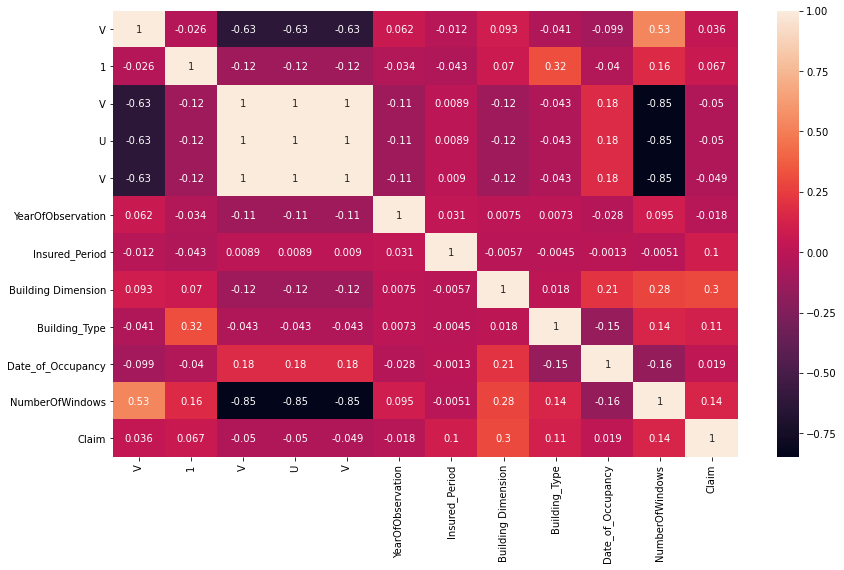

In [57]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
v=df.corr()
sns.heatmap(v, annot=True,)

In [62]:
df.drop(['Geo_Code', 'Customer Id'],axis=1,inplace=True)  # dropping irrevelant columns

In [63]:
df.head()

,V,1,V,U,V,YearOfObservation,Insured_Period,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
0,0,0,1,1,1,2013,1.0,290.0,1,1960.0,0,0
1,1,0,0,0,0,2015,1.0,490.0,1,1850.0,4,0
2,0,0,1,1,1,2014,1.0,595.0,1,1960.0,0,0
3,1,0,1,1,1,2013,1.0,2840.0,1,1960.0,0,0
4,1,0,0,0,0,2014,1.0,680.0,1,1800.0,3,0


In [ ]:
df['NumberOfWindows'].unique()

In [66]:
y=df['Claim']
X=df.drop(["Claim"], axis=1) #labels

## Logistic Regression

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression

In [79]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [80]:
predictions = logmodel.predict(X_test)

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1650
           1       0.74      0.12      0.21       510

    accuracy                           0.78      2160
   macro avg       0.76      0.56      0.54      2160
weighted avg       0.77      0.78      0.72      2160



In [84]:
from sklearn import metrics

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.21712962962962962
MSE: 0.21712962962962962
RMSE: 0.4659717047521551


## Decision Tree Model

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dtree = DecisionTreeClassifier()

In [89]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
predictions = dtree.predict(X_test)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1650
           1       0.37      0.38      0.37       510

    accuracy                           0.70      2160
   macro avg       0.59      0.59      0.59      2160
weighted avg       0.70      0.70      0.70      2160



In [93]:
print(confusion_matrix(y_test,predictions))

[[1315  335]
 [ 317  193]]


## Random Forest model

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rfc = RandomForestClassifier(n_estimators=600)

In [96]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

In [97]:
predictions = rfc.predict(X_test)

In [98]:
from sklearn.metrics import classification_report,confusion_matrix

In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1650
           1       0.53      0.28      0.37       510

    accuracy                           0.77      2160
   macro avg       0.67      0.60      0.61      2160
weighted avg       0.74      0.77      0.74      2160



In [100]:
print(confusion_matrix(y_test,predictions))

[[1520  130]
 [ 366  144]]
